# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [ ]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_labels.csv to test_labels.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_labels.csv to train_labels.csv
sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [ ]:
def load_logistic_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [ ]:
def sigmoid(input):

  # dummy assignment until the function is filled in
  #output = np.zeros(len(input))
  output = 1/(1 + np.exp(-input))
  return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [ ]:
def predict_logistic_regression(inputs, weights):

  # dummy assignment until the function is filled in
  predicted_probabilities = []
  w_T = weights.transpose()#65X1
  logi = sigmoid(np.dot(inputs,w_T)) #100x1
  prob_zero = 1 - logi
  predicted_probabilities = np.concatenate((prob_zero, logi), axis = 1)
  return predicted_probabilities

# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [ ]:
def eval_logistic_regression(inputs, weights, labels):
  #labels 100X1
  # dummy assignment until the function is filled in
  prob = predict_logistic_regression(inputs, weights) #100X2
  logis = prob[:,1]
  logis = logis.reshape(len(inputs),1)
  logi = np.log(logis) #100X1
  logist = np.log(1 - logis)
  #neg_log_probs = ((logi*labels) + ((1-labels)*logist))
  logi_t=logi.transpose()
  logist_t=logist.transpose()
  #neg_log_prob = neg_log_probs.sum()
  neg_log_prob = -1*(np.dot(logi_t,labels)+ np.dot(logist_t,(1-labels)))
  logi_a = logis + 0.01
  logi_predicted = np.round(logi_a,0)
  logi_predicted = logi_predicted.astype(int)
  ## remember to reshape the logi predicted and label
  tot = len(logi_predicted)
  count = 0
  for i,j in zip(logi_predicted,labels):
    if i == j:
      count = count + 1
  accuracy = (count/tot)*100
  return neg_log_prob, accuracy

Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.05,0.05]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [ ]:
def initialize_weights(n_weights):

  # dummy assignment until the function is filled in
  #random_weights = np.zeros(n_weights)
  random_weights = np.random.uniform(-0.05, 0.05, n_weights)
  random_weights = random_weights.reshape(1,65)
  return random_weights

# Function train_logistic_regression

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop Newton's algorithm when the maximum change for all weights is less than 0.001 in two consecutive iterations. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)



In [ ]:
def train_logistic_regression(train_inputs, train_labels, lambda_hyperparam):

  # dummy assignment until the function is filled in
  #weights = np.zeros(train_inputs.shape[1])
  flag = 0
  weights = initialize_weights(len(train_inputs[0])) ## 1*65
  w_T = weights.transpose() ## 65*1
  #print("wT",w_T.shape)
  #print("train_inputs",train_inputs.shape)
  ## train_inputs dimension 900*65
  logi = sigmoid(np.dot(train_inputs,w_T)) ## 900 * 1
  one_minus_logi = 1 - logi
  Rnn_ = logi * one_minus_logi  ## 900 * 1 matrics
  Rnn_ = Rnn_.reshape(1,len(train_inputs))
  Rnn = np.diag(Rnn_[0])  ## 900 * 900
  inputs_T = train_inputs.transpose() ## 65 * 900
  H_stag = np.dot(inputs_T, Rnn) ## 65 * 900
  H = np.dot(H_stag, train_inputs) ## 65 * 65
  lambda_identity = lambda_hyperparam * np.identity(len(H)) ## 65 * 65
  H_regularized = H + lambda_identity  ## 65 * 65
  H_inv=np.linalg.inv(H_regularized)
  grad = logi - train_labels #900X1
  grad_T = grad.transpose() #1X900
  gradient = np.dot(grad_T, train_inputs) #1X65
  lambda_weights = lambda_hyperparam * weights #1X65
  gradient_loss = gradient + lambda_weights #1X65
  prod = np.dot(gradient_loss,H_inv) #1X65
  while (np.amax(prod) >= 0.001 or flag == 0):
    weights = weights - prod ## 1*65
    w_T = weights.transpose()  ## 65*1
    logi = sigmoid(np.dot(train_inputs,w_T))  ## 900*1
    one_minus_logi = 1 - logi
    Rnn_ = logi * one_minus_logi  ## 900*1
    Rnn_ = Rnn_.reshape(1,len(train_inputs))  ## 900*1
    Rnn = np.diag(Rnn_[0])  ## 900*900
    inputs_T = train_inputs.transpose() ## 65*900
    H_stag = np.dot(inputs_T, Rnn)  ## 65*900
    H = np.dot(H_stag, train_inputs) ## 65*65
    lambda_identity = lambda_hyperparam * np.identity(len(H))  ## 65*65
    H_regularized = H + lambda_identity  ##  65*65
    H_inv=np.linalg.inv(H_regularized)  ## 65*65
    grad = logi - train_labels
    grad_T = grad.transpose()
    gradient = np.dot(grad_T, train_inputs)
    lambda_weights = lambda_hyperparam * weights
    gradient_loss = gradient + lambda_weights
    prod = np.dot(gradient_loss,H_inv)
    if np.amax(prod) < 0.001:
      flag = 1
    elif np.amax(prod) >= 0.001:
      flag = 0
  ##check the dimension of w has to be 1*M+1
  return weights

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [ ]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels):
  
  # dummy assignments until the function is filled in
  best_hyperparam = 0
  best_neg_log_prob = 0
  neg_log_probabilities = []
  accuracies_list = []
  nlprob_list = []
  param_list = []
  for param in hyperparameters:
    accuracies = []
    nlp_list = []
    param_list.append(param)
    x = np.array_split(inputs, k_folds, axis=0)
    x_label = np.array_split(labels, k_folds, axis=0)
    for i in range(k_folds):
      val_inputs = x[i]  ## 100 * 65
      t = np.delete(x, i, axis=0)
      t1 = t.transpose(2,0,1).reshape(65,-1)
      train_inp = t1.transpose()  ## 900 * 65
      val_labels = x_label[i]   ## 100 * 1
      v_t = np.delete(x_label, i, axis=0)
      v_t1 = v_t.transpose(2,0,1).reshape(1,-1)
      train_lab = v_t1.transpose() ##  900 * 1
      weights = train_logistic_regression(train_inp, train_lab, param) ##  1 * 65
      n_l_p, acc = eval_logistic_regression(val_inputs, weights, val_labels)
      accuracies.append(acc)
      nlp_list.append(n_l_p)
    avg_acc = (sum(accuracies)/len(accuracies))
    accuracies_list.append(avg_acc)
    avg_nlp = (sum(nlp_list)/len(nlp_list))
    avg_nlp = avg_nlp[0][0]
    nlprob_list.append(avg_nlp)
    neg_log_probabilities.append(avg_nlp)
  index = sorted(range(len(nlprob_list)), key = lambda k1: nlprob_list[k1])
  best_hyperparam = param_list[index[0]]
  best_neg_log_prob = neg_log_probabilities[index[0]]
  return best_hyperparam, best_neg_log_prob, neg_log_probabilities

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)

In [ ]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams):
  plt.plot(hyperparams,neg_log_probabilities)
  plt.ylabel('negative log probability')
  plt.xlabel('lambda')
  plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

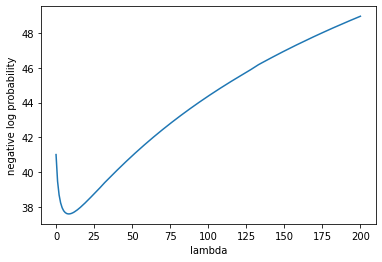

best lambda: 8
best cross validation negative log probability: 37.6089026468225
test accuracy: 88.18181818181819
test negative log probability: [[33.29470074]]


In [ ]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
train_labels = train_labels.reshape(1000,1)
test_labels = test_labels.astype(int) - 5
test_labels = test_labels.reshape(110,1)

# lambda values to be evaluated by cross validation
hyperparams = range(201) 
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels)

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,list(hyperparams))
print('best lambda: ' + str (best_lambda))
print('best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights = train_logistic_regression(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('test accuracy: ' + str(accuracy))
print('test negative log probability: ' + str(neg_log_prob))



# Part II
1.   Logistic regression classifier finds a linear seperator which is w'x_bar seperating at p = 0.5. Whereas, Knn finds a non-linear seperator.Expressivity of the seperator depends on the space of functions that each technique searches over to find a seperator. In that terms, logistic regression classifier model searches in a smaller space of functions for linear seperator. Because, linear seperators has to be a straight line in a 2D space and a hyperplane in higher dimension space. Whereas, Knn would search in a bigger space of non-linear functions(like, polynomials or curves) for a non-linear seperator. Thus, Knn classifier is more expressive that logistic regression classifier.

> Under situations where there are no clear linear seperation between the classes of dataset, non-linear classifiers like Knn will be highly accurate if the training dataset is large enough. On the other hand, if the dataset has clear linear seperator (line or hyperplane), then a linear classifier like logistic regression classifier would perform better, with higher accuracy.

> Noise could be yet another factor that decrease the performance of linera classifier. If we pay too much attention to noise when choosing the hyperplane, we tend to overfit and it will provide inaccurate results on a new data points.

> Here, for outer digits dataset, the training set is linearly seperable which explains the higher accuracy of predicted class using logistic regression classifier(**88%**) rather than Knn classifier(**77%**).







2.   Yes, the dataset is linearly seperable. The plot below shows the graph of negative log probability for the weights during iterations for weight optimization.

> Here, we see that for a lambda value, the negative log probability value converges for weights as the weights gets optimized. This is only possible if the dataset in linearly seperable. Thus the convergence of the negative log probability to a global minimum shows the linear seperability of the train dataset used here.





In [ ]:
def linear_seperability(train_inputs, train_labels, lambda_hyperparam):
  flag = 0
  nn = []
  weights = initialize_weights(len(train_inputs[0])) ## 1*65
  neglp, accc = eval_logistic_regression(train_inputs, weights, train_labels)
  nn.append(neglp[0][0])
  w_T = weights.transpose() ## 65*1
  logi = sigmoid(np.dot(train_inputs,w_T)) ## 900 * 1
  one_minus_logi = 1 - logi
  Rnn_ = logi * one_minus_logi  ## 900 * 1 matrics
  Rnn_ = Rnn_.reshape(1,len(train_inputs))
  Rnn = np.diag(Rnn_[0])  ## 900 * 900
  inputs_T = train_inputs.transpose() ## 65 * 900
  H_stag = np.dot(inputs_T, Rnn) ## 65 * 900
  H = np.dot(H_stag, train_inputs) ## 65 * 65
  lambda_identity = lambda_hyperparam * np.identity(len(H)) ## 65 * 65
  H_regularized = H + lambda_identity  ## 65 * 65
  H_inv=np.linalg.inv(H_regularized)
  grad = logi - train_labels #900X1
  grad_T = grad.transpose() #1X900
  gradient = np.dot(grad_T, train_inputs) #1X65
  lambda_weights = lambda_hyperparam * weights #1X65
  gradient_loss = gradient + lambda_weights #1X65
  prod = np.dot(gradient_loss,H_inv) #1X65
  while (np.amax(prod) >= 0.001 or flag == 0):
    weights = weights - prod ## 1*65
    neglp, accc = eval_logistic_regression(train_inputs, weights, train_labels)
    nn.append(neglp[0][0])
    w_T = weights.transpose()  ## 65*1
    logi = sigmoid(np.dot(train_inputs,w_T))  ## 900*1
    one_minus_logi = 1 - logi
    Rnn_ = logi * one_minus_logi  ## 900*1
    Rnn_ = Rnn_.reshape(1,len(train_inputs))  ## 900*1
    Rnn = np.diag(Rnn_[0])  ## 900*900
    inputs_T = train_inputs.transpose() ## 65*900
    H_stag = np.dot(inputs_T, Rnn)  ## 65*900
    H = np.dot(H_stag, train_inputs) ## 65*65
    lambda_identity = lambda_hyperparam * np.identity(len(H))  ## 65*65
    H_regularized = H + lambda_identity  ##  65*65
    H_inv=np.linalg.inv(H_regularized)  ## 65*65
    grad = logi - train_labels
    grad_T = grad.transpose()
    gradient = np.dot(grad_T, train_inputs)
    lambda_weights = lambda_hyperparam * weights
    gradient_loss = gradient + lambda_weights
    prod = np.dot(gradient_loss,H_inv)
    if np.amax(prod) < 0.001:
      flag = 1
    elif np.amax(prod) >= 0.001:
      flag = 0  
  return nn

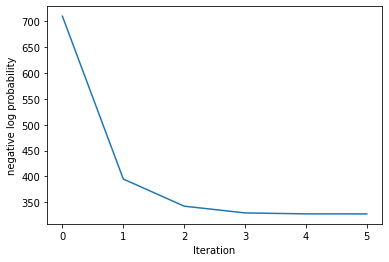

In [ ]:
iter = linear_seperability(train_inputs, train_labels, 4)
plt.plot(range(len(iter)),iter)
plt.ylabel('negative log probability')
plt.xlabel('Iteration')
plt.show()